# Data exploration
Before starting manipulating the data, it is important to get to know them

List of features whose meaning might not be clear at a first glance:
* __Region_GDP__ : Gross Domestic Product is an indicator of economic development and prosperity. (Prodotto Interno Lordo in Italian)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})  

import warnings 
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
dataset = pd.read_csv('./dataset/train.csv')

### Numerical variables

In [12]:
dataset.describe(exclude=[np.number])

,Date,StoreType,AssortmentType,Events
count,523021,523021,523021,398923
unique,729,4,3,21
top,27/01/2017,Hyper Market,General,Rain
freq,749,292769,296188,204733


### Summary stats for categorical variables

In [10]:
dataset.describe()

,StoreID,IsHoliday,IsOpen,HasPromotions,NearestCompetitor,Region,NumberOfCustomers,NumberOfSales,Region_AreaKM2,Region_GDP,...,Mean_TemperatureC,Mean_VisibilityKm,Mean_Wind_SpeedKm_h,Min_Dew_PointC,Min_Humidity,Min_Sea_Level_PressurehPa,Min_TemperatureC,Min_VisibilitykM,Precipitationmm,WindDirDegrees
count,523021.000000,523021.000000,523021.000000,523021.000000,523021.00000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,...,523021.000000,511683.000000,523021.000000,523021.000000,523021.000000,523021.000000,523021.000000,511683.000000,523021.000000,523021.000000
mean,1373.953914,0.029718,0.829714,0.383292,8002.71122,5.713151,259.325073,4057.377536,12381.265718,14050.547848,...,10.273205,12.151025,11.724961,3.737584,51.375624,1012.078435,6.202315,7.223408,0.808278,170.458096
std,216.395820,0.169808,0.375884,0.486189,11537.70753,3.357190,185.857102,2729.630381,9140.692427,2755.425404,...,7.041167,4.978385,5.791031,5.909098,19.284023,8.699236,6.312993,4.899575,2.631428,101.728193
min,1000.000000,0.000000,0.000000,0.000000,47.00000,0.000000,0.000000,0.000000,344.000000,9893.000000,...,-13.000000,0.000000,2.000000,-18.000000,10.000000,970.000000,-15.000000,0.000000,0.000000,-1.000000
25%,1187.000000,0.000000,1.000000,0.000000,1057.00000,3.000000,166.000000,2573.000000,7215.000000,11849.000000,...,4.000000,10.000000,8.000000,-1.000000,36.000000,1007.000000,1.000000,3.000000,0.000000,75.000000
50%,1373.000000,0.000000,1.000000,0.000000,3321.00000,6.000000,251.000000,4020.000000,9643.000000,15017.000000,...,11.000000,11.000000,11.000000,4.000000,51.000000,1013.000000,7.000000,8.000000,0.000000,191.000000
75%,1561.000000,0.000000,1.000000,1.000000,9673.00000,9.000000,345.000000,5538.000000,15566.000000,15931.000000,...,16.000000,14.000000,14.000000,8.000000,66.000000,1018.000000,11.000000,10.000000,0.250000,250.000000
max,1748.000000,1.000000,1.000000,1.000000,85070.00000,10.000000,2206.000000,26641.000000,32221.000000,23931.000000,...,30.000000,31.000000,53.000000,18.000000,100.000000,1038.000000,24.000000,31.000000,58.930000,360.000000


### OHE is needed for events, AssortmentType and StoreType
Cannot compute correlation otherwise

## Pearson's correlation coefficient

We can start to identify the most important dependences between pairs of features, in particular, what we are interested in is the correlation or anticorrelation that the target NumberOfSales has with the other features.

A complete correlation matrix would be too big to be visualized, let's try to spot the variables that could influence the sales by using simple common sense.

Important variables: 
* IsOpen
* HasPromotions
* NearestCompetitor
* Region_GDP
* IsHoliday
* Region
* Events


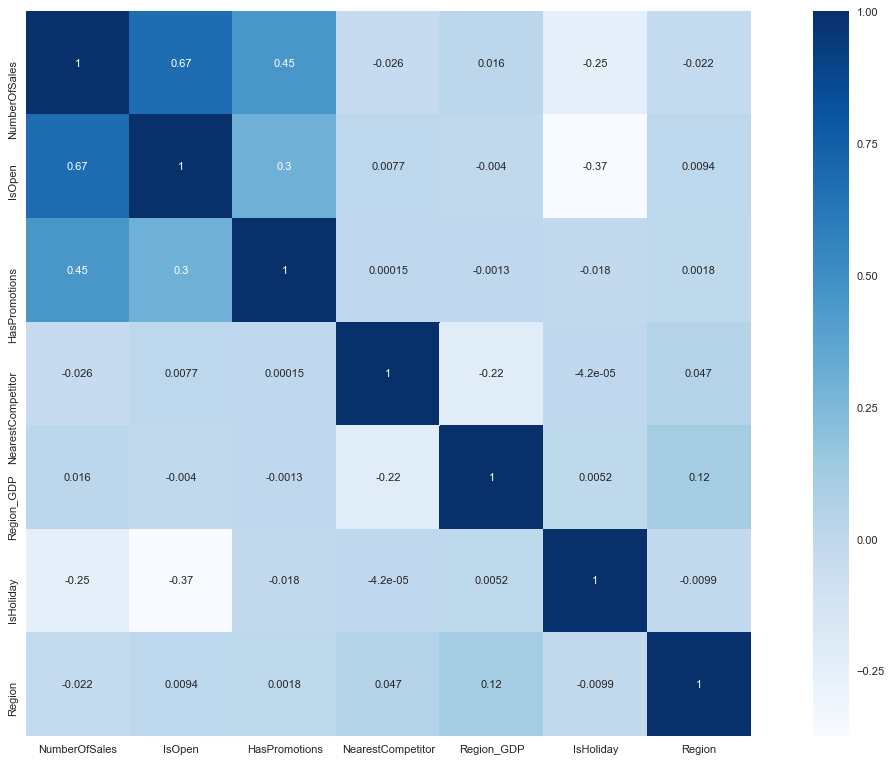

In [21]:
plt.rcParams['figure.figsize'] = [20.0,12.0]
plt.rcParams['figure.dpi']=80
covariance=dataset[['NumberOfSales','IsOpen','HasPromotions','NearestCompetitor','Region_GDP','IsHoliday','Region','Events']].corr(method='pearson')
sns.heatmap(covariance,square=True,annot=True,cmap="Blues")